In [47]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Práctica 2: Optimizar función

Usaremos el paquete [Pygad](https://pygad.readthedocs.io/en/latest/) para hallar _óptimos_ de una función diferenciable.

## Objetivo

Hallar el _óptimo_ de la función

$$
f(x,y)=(x-2)^2+(y-2)^2
$$

```{figure} ./images/ga_funcion2variables.png
Función de dos variables
```

Sabemos que $f$ tiene un mínimo (local) en el punto $(2,2)$. __¿Cómo?__

Vamos a comprobar si el __algoritmo genético__ es capaz de hallar dicho punto.

In [48]:
def fitness_func(ga_instance, solution, solution_idx):
    
    x,y=solution
    fvalue = (x-2)**2+(y-2)**2
    # maximization problem
    return 1/fvalue #attention possible inf

fitness_function = fitness_func

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#life-cycle-of-pygad
def on_generation(ga):
    print('Generación',ga.generations_completed)
    print(ga.population)

def on_start(ga):
    print('Starting generation',ga.generations_completed)
    print(ga.population)

## Librería PyGAD

````{tab-set}
```{tab-item} Pip
pip3 install pygad
```

```{tab-item} Conda
conda install pygad
```
````

<a href="https://pygad.readthedocs.io/en/latest/" target="_blank">PyGAD</a> es una biblioteca Python de código abierto para construir algoritmos genéticos y con los que optimizar algoritmos de aprendizaje automático.

Entre los problemas de aprendizaje automático que se pueden abordar con un algoritmo genético:
* __Clustering__: <a href="https://github.com/ahmedfgad/GeneticAlgorithmPython/blob/master/examples/clustering/example_clustering_2.py" target="_blank">Ejemplo 2D</a> y <a href="https://github.com/ahmedfgad/GeneticAlgorithmPython/blob/master/examples/clustering/example_clustering_3.py" target="_blank">Ejemplo 3D</a>.
* También es posible entrenar un modelo de __red neuronal__ para efectuar regresión o una clasificación con un algoritmo genético. (<a href="https://neptune.ai/blog/train-pytorch-models-using-genetic-algorithm-with-pygad" target="_blank">Ver explicación</a>). Los pesos de la red son cromosomas y la función de fitness está conectada con el resultado de la función de pérdida. Para ello PyGAD cuenta con el módulo <a href="https://pygad.readthedocs.io/en/latest/torchga.html" target="_blank">torchga</a>.

En un algoritmo genético, se comienza con una __población inicial de cromosomas__, que son posibles soluciones a un problema determinado. Esos cromosomas constan de una serie de __genes__, que pueden ser bits/ints/floats... También se especifica un rango de valores permitidos (por ejemplo, números enteros del 0 al 9).

Todo el problema de optimización está codificado en una función de aptitud (__fitness__), que recibe un cromosoma y devuelve un número que indica la aptitud (o bondad) de la solución. Cuanto mayor sea la aptitud, mejor será la solución codificada en el cromosoma.

Luego comienza el bucle. En cada iteración (__generación__), se selecciona una cantidad de cromosomas buenos para la reproducción (__selección de padres__). Los padres se combinan de dos en dos (__cruzamiento__) para generar __nuevos cromosomas (hijos)__. Finalmente, los hijos son __mutados__ modificando de forma un tanto aleatoria parte de sus genes, lo que permite que surjan soluciones completamente nuevas. Los hijos pasan a la siguiente generación y comienza una nueva iteración (En algunos casos, es posible dejar que algunos padres sobrevivan; esto se maneja desde el parámetro __keep_parents__ en PyGAD).

El ciclo se detiene después de un número determinado de generaciones (= __iterations__) o según un criterio de detención (por ejemplo, no hay mejora durante un tiempo).

### Parámetros


<a href="https://pygad.readthedocs.io/en/latest/pygad.html#parent-selection-methods" target="_blank">Librería PyGAD de Algoritmos Genéticos</a>

* __num_generations__ : número de generaciones.
* __num_parents_mating__ : número de padres necesarios para el cruzamiento.
* __sol_per_pop__ : número de soluciones (es decir cromosomas) dentro de la población. Este parámetro no tiene efecto si existe el parámetro initial_population.
* __initial_population__: Una población inicial definida por el usuario. Es útil cuando el usuario desea iniciar las generaciones con una población inicial personalizada. El __valor predeterminado es None__, lo que significa que el usuario no especifica ninguna población inicial. En este caso, PyGAD crea una población inicial utilizando los parámetros __sol_per_pop__ y __num_genes__. Se genera una excepción si la población_inicial es None mientras cualquiera de los 2 parámetros (sol_per_pop o num_genes) es tambiém None.
* __num_genes__: número de genes en cada solución o cromosoma.
* __mutation_num_genes__: numero de genes a mutar. El valor defecto None significa que ningún número es especificado.
* __init_range_low__: el valor mínimo en el valor de los genes a aplicar en la selección random.
* __init_range_high__: el valor máximo en el valor de los genes a aplicar en la selección random.
* __parent_selection_type__: Tipo de selección de los padres (<a href="https://pygad.readthedocs.io/en/latest/pygad.html#parent-selection-methods" target="_blank">Parent Selection Methods in PyGAD</a>).
    - __"sss"__ : Selección de estado estacionario.
    - __"rank"__ : Selección de rango.
    - __"random"__ : Aleatoriamente.
    - __"tournament"__ : Por torneos.
    - __"rws"__ : Por ruleta.
    - __"sus"__ : Muestreo universal estocástico.
* __keep_parents__: Número de padres en la siguiente generación.
    - __-1__: mantener todos los padres.
    - __0__: ningún padre.
    - __>1__: número de padres a mantener.
* __gene_type__: Controla el tipo de gen. Se puede asignar a un único tipo de datos que se aplica a todos los genes o puede especificar el tipo de datos de cada gen individual. El valor predeterminado es __float__, lo que significa que todos los genes son del tipo de datos flotantes. Los tipos que se pueden usar son __int__, __float__, y __numpy.int/uint/float(8-64)__. Para definir tipos específicos en cada gen se usa una tupla, lista o numpy.ndarray; (por ejemplo  gene_type=[int, float, numpy.int8])
* __crossover_type__: Tipo de operación de cruce. Los tipos admitidos son __single_point__ (para cruce de un solo punto), __two_points__ (para cruce de dos puntos), __uniform__ (para cruce uniforme) y __scattered__ (para cruce disperso). El cruce disperso es compatible con PyGAD 2.9.0 y superiores. El __valor predeterminado es single_point__.
* __mutation_type__: Tipo de operación de mutación. Los tipos admitidos son __random__ (para mutación aleatoria), __swap__ (para mutación de intercambio), __inversion__ (para mutación por inversión), __scramble__ (para mutación codificada) __adaptive__ (para mutación adaptativa) y __None__ (no se aplica mutación). Por defecto es __random__.
* __mutation_percent_genes__: Porcentage de genes a mutar. El valor por defecto es __default__ que indica un 10%. Se debe indicar, si no, un __valor > 0 y <=100__.

### Tipos de selección de padres

La selección de padres hace referencia al modo en como se eligen los individuos de una generación para cruzarse y dar lugar a los individuos de la siguiente generación.

* __Steady-state selection (sss, default)__ :  En un algoritmo genético de __estado estacionario__, sólo se reemplazan unos pocos individuos a la vez, lo que significa que __la mayoría de los individuos pasarán a la siguiente generación__; no hay generación per se.
* __Roulette wheel selection (rws)__: La selección de rueda de __ruleta__ es un algoritmo de selección proporcional de aptitud (FPS), una de las formas más populares de selección de padres. Cada individuo puede convertirse en padre con una probabilidad proporcional a su aptitud. La elección de un individuo se puede representar como hacer girar una ruleta que tiene tantas casillas como individuos en la generación actual, con tamaños que dependen de su probabilidad. Por tanto, no existe una garantía sólida de "supervivencia del más fuerte": los buenos candidatos pueden ser eliminados, mientras que los peores pueden sobrevivir. Cada vez que es necesario seleccionar a un padre, se hace girar la rueda, lo que significa que un individuo puede ser seleccionado varias veces, y los más aptos tienen un __fuerte sesgo__.
* __Stochastic universal sampling selection (sus)__: La Selección de __muestreo universal estocástico__ es una selección proporcional de aptitud __insesgada__ y tiene una __dispersión mínima__. Se utiliza la misma ruleta que en RWS, con las mismas proporciones, pero en lugar de usar un único punto de selección y girar la ruleta una y otra vez hasta que se hayan seleccionado todos los individuos necesarios, aquí se seleccionan todos los padres a la vez. Para ello, la rueda se hace girar sólo una vez y múltiples puntos de selección espaciados uniformemente alrededor de la rueda determinan qué individuos se sortean. Esto da a los miembros más débiles de la población (según su aptitud) la oportunidad de ser elegidos, y también anima a los más aptos a ser elegidos al menos una vez.
<img src="./images/SeleccionEstocastica.png" alt="1Pto" class="bg-primary mb-1" width="450px" align="center">
* __Rank selection (rank)__: La selección de rango es útil cuando la población tiene valores de aptitud muy cercanos. En este caso, usar una ruleta (RWS, SUS) significaría que todos los individuos tendrían básicamente la misma probabilidad de ser elegidos... Entonces, la idea es basar las probabilidades no en el valor de aptitud en sí, sino en el __rango__ del individuo. Es decir, primero clasificamos a los individuos del valor de aptitud más alto al más bajo (i = 1..N), asignamos las probabilidades de ser elegidos en función de la suma de los valores de aptitud / i y finalmente hacemos girar la rueda. Tenga en cuenta que esto sería una selección de rango lineal: los rangos están en una progresión lineal. Existen otros esquemas de selección de rango, por ejemplo, exponencial.
* __Random selection (random)__: Los padres se seleccionan __aleatoriamente__ de la población, sin importar su aptitud.
* __Tournament selection (tournament)__: La selección por __torneo__ funciona seleccionando K individuos (tamaño del torneo) al azar (torneo) y escogiendo al más apto de ellos (el ganador) para la reproducción. La presión de selección depende de K: __cuanto mayor sea K__, más fuerte será la presión, ya que __los individuos más débiles tendrán más adversarios__ y, por tanto, mayores posibilidades de perder. En PyGAD, el tamaño del torneo está controlado por el parámetro __K_tournament__.

### Tipos de cruce
* __Cruce por 1 punto__: Se toma un punto aleatorio en los dos padres, quedando divididos ambos en cola y cabeza. Las colas se separa para dar forma a los hijos:

<img src="./images/Cruce1Punto.png" alt="1Pto" class="bg-primary mb-1" width="450px" align="center">

* __Cruce por 2 puntos__: Se toman 2 puntos de corte sin que ninguno coincida con los extremos y entre sí, para que se formen 3 segmentos en cada cromosoma padre. Para generar los hijos se escoge el segmento central de uno de los padres y los segmentos laterales del otro padre:

<img src="./images/Cruce2Puntos.png" alt="2Pto" class="bg-primary mb-1" width="450px" align="center">

* __Cruce uniforme__: Se lanza una moneda para decidir si cada gen se deja intacto o se toma del otro padre. En otras palabras, cada gen se elige de cualquiera de los padres con la misma probabilidad. La técnica se repite para cada nuevo hijo. En algunas librerías (pero no en PyGAD), es posible sesgar la moneda hacia uno de los padres, lo que hace que los hijos hereden más de él.

<img src="./images/CruceUniforme.png" alt="CruceUniforme" class="bg-primary mb-1" width="650px" align="center">

* __Cruce disperso__: Cada gen se elige aleatoriamente entre los dos padres. En el cruce disperso, se genera un vector binario aleatorio del tamaño de los cromosomas. Los genes del nuevo hijo se toman de uno de los padres cuando su índice en el vector binario es igual a 0 y del otro padre cuando es igual a 1:

<img src="./images/CruceDisperso.png" alt="CruceDisperso" class="bg-primary mb-1" width="450px" align="center">


### Tipos de mutación
* __random (predeterminado)__: se asigna un valor __aleatorio__ del conjunto de valores permitidos a un gen elegido al azar.

* __swap__: Intercambio, se seleccionan dos genes al azar y se intercambian sus valores.

* __inversion__ : Inversión, se selecciona una secuencia consecutiva de genes y se invierten sus valores.

* __scramble__: Mezcla, como en el caso de la inversión, se selecciona una secuencia consecutiva de genes, pero esta vez sus valores se mezclan aleatoriamente.

* __adaptive__: Adaptativo, aplica una serie de mutaciones aleatorias relativas a la aptitud del individuo. Es decir, los hijos con un valor de aptitud alto sufrirán menos mutaciones que los hijos con valores de aptitud bajos. Las variaciones reales están bajo control, especificando un límite inferior y superior en lugar de un valor único para mutación_num_genes/mutation_probability/mutation_percent_genes (consulte Uso de mutación adaptativa en PyGAD). La idea detrás de esto es sencilla: alterar los cromosomas buenos tiene una alta probabilidad de degradarlos, y viceversa.

In [49]:
num_generations = 25

# num_parents_mating: Number of solutions to be selected as parents.
# número de padre
num_parents_mating = 4

# sol_per_pop: Number of solutions (i.e. chromosomes) within the population. 
#This parameter has no action if initial_population parameter exists.
sol_per_pop = 20

#num_genes: Number of genes in the solution/chromosome. 
#This parameter is not needed if the user feeds the initial population to the initial_population parameter
num_genes = 2

# mutation_num_genes=None: Number of genes to mutate which defaults to None meaning that no number is specified.
mutation_num_genes = 2

#init_range_low=-4: The lower value of the random range from which the gene values 
#in the initial population are selected. 
#init_range_low defaults to -4.
init_range_low=-10
init_range_high=10

#https://pygad.readthedocs.io/en/latest/pygad.html#parent-selection-methods
parent_selection_type= "sss"

#keep_parents=-1: Number of parents to keep in the current population. 
#-1 (default) means to keep all parents in the next population. 
#0 means keep no parents in the next population. 
#A value greater than 0 means keeps the specified number of parents in the next population. 
#Note that the value assigned to keep_parents cannot be < - 1 
#or greater than the number of solutions within the population sol_per_pop.
keep_parents = 1

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#data-type-for-all-genes-without-precision
gene_type=float

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#supported-crossover-operations
crossover_type = "single_point"

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#supported-mutation-operations
mutation_type="random"

# mutation_percent_genes="default": Percentage of genes to mutate. 
#It defaults to the string "default" which is later translated into the integer 10 
#which means 10% of the genes will be mutated. 
#It must be >0 and <=100. 
#Out of this percentage, the number of genes to mutate is deduced 
#which is assigned to the mutation_num_genes parameter. 
mutation_percent_genes = 10

### Definición del algoritmo genético

In [53]:
import pygad

In [54]:
ga_instance = pygad.GA(num_generations=num_generations,
                       sol_per_pop=sol_per_pop,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       num_genes=num_genes,
                       mutation_num_genes=mutation_num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       gene_type=gene_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True,
                       on_generation=on_generation,
                       on_start=on_start)

### Llamada a la optimización

In [55]:
ga_instance.run()

Starting generation 0
[[-7.67087984 -9.0301974 ]
 [-2.33215114  9.15885418]
 [-8.19268154  8.04024572]
 [-3.28181902 -8.54367824]
 [ 8.37446347  6.90130649]
 [ 6.25870076 -5.14358581]
 [-0.82163372  7.12694583]
 [-6.13529159  0.37891342]
 [-1.68203744  8.87685038]
 [-7.91832551  0.64863416]
 [-2.8900868  -1.58605945]
 [ 6.87639234 -1.86859361]
 [ 2.32956507 -0.02943717]
 [-8.5955044   0.75313841]
 [-5.03019589 -7.13402244]
 [ 2.85064082 -5.99111137]
 [-4.34701113  3.68379931]
 [-3.74370496  4.15008856]
 [ 1.84783045 -9.59668864]
 [ 2.58105104  6.87360596]]
Generación 1
[[ 2.32956507 -0.02943717]
 [ 2.74032969  6.54663147]
 [-0.47487666  6.58660982]
 [-3.74993117 -1.07984418]
 [-3.15189277  0.53852465]
 [ 2.42159023  7.66536567]
 [-0.15205264  6.34352686]
 [-0.50557054 -2.48925422]
 [-2.65413509 -0.44230758]
 [ 1.70840703  6.48651126]
 [ 1.73600041  7.10200759]
 [-3.69012815 -2.0639661 ]
 [ 3.27646096 -0.92275271]
 [ 2.68847295  7.30318383]
 [ 3.35663723  8.01843382]
 [-3.48797023 -1.54

### Resultados

In [56]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [57]:
print("best_solution: {solution}".format(solution =solution)) 

best_solution: [2.08197908 1.97989664]


In [58]:
print("best_solution fitness: {}".format(solution_fitness))
print("Valor de f: {}".format(1/solution_fitness))

best_solution fitness: 140.35648598850153
Valor de f: 0.007124715277368253


In [59]:
solution_idx

0

### Parámetros de plot_fitness

- __title__ : título.
- __xlabel__ : etiqueta eje x.
- __ylabel__ : etiqueta eje y.
- __linewidth__ : ancho de la línea.
- __font_size__ : tamaño del fuente.
- __plot_type__ : "plot", "scatter", "bar".
- __color__ : color.
- __label__ : etiqueta de la serie. Para un uso multiobjetivo
- __save_dir__ : Directorio donde guardar el gráfico.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


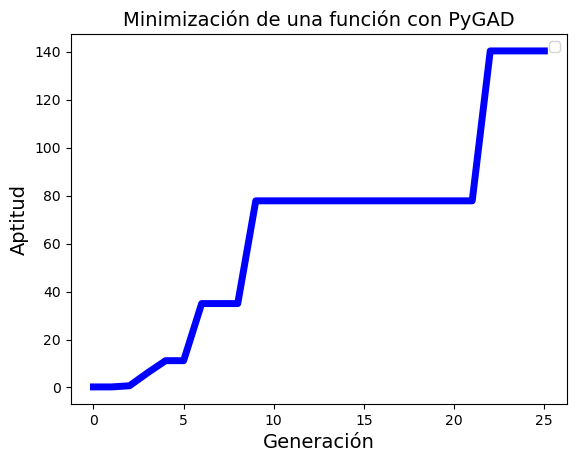

In [87]:

ga_instance.plot_fitness(plot_type="plot", title="Minimización de una función con PyGAD", 
                         linewidth=5, xlabel="Generación", ylabel="Aptitud", color="blue")
plt.close()

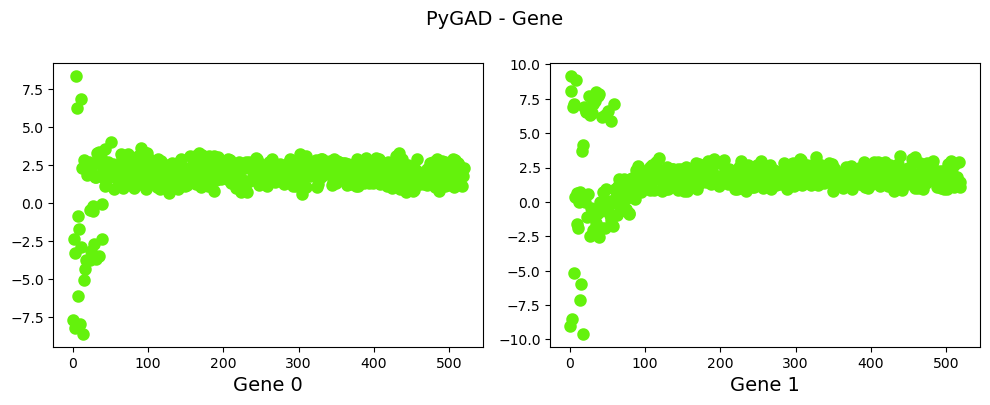

In [66]:
ga_instance.plot_genes(plot_type="scatter")
plt.close()

In [62]:
ga_instance.population

array([[2.08197908, 1.97989664],
       [1.98049541, 0.96809355],
       [2.17969073, 2.72126879],
       [2.23854363, 2.44656747],
       [1.98313237, 2.72599926],
       [2.87895429, 2.18211736],
       [1.04514745, 1.34353613],
       [1.52648709, 2.98481515],
       [2.86878555, 2.12902233],
       [1.59841013, 2.60212449],
       [1.85507776, 1.08845205],
       [2.05389772, 2.68874804],
       [2.63556964, 1.64724639],
       [2.54571333, 1.6260582 ],
       [1.72627628, 1.8161593 ],
       [2.15934625, 1.58409002],
       [1.79700915, 1.54559267],
       [1.14354559, 2.89730028],
       [1.82073045, 1.06397817],
       [2.32584247, 1.48036302]])